[![View slides in browser](https://img.shields.io/badge/view-slides-orange?logo=github)](https://stefmolin.github.io/pandas-workshop/slides/html/workshop.slides.html#/section-2)

---



# Section 2: Data Wrangling

To prepare our data for analysis, we need to perform data wrangling. In this section, we will learn how to clean and reformat data (e.g., renaming columns and fixing data type mismatches), restructure/reshape it, and enrich it (e.g., discretizing columns, calculating aggregations, and combining data sources).

## Data cleaning

In this section, we will take a look at creating, renaming, and dropping columns; type conversion; and sorting &ndash; all of which make our analysis easier. We will be working with the 2019 Yellow Taxi Trip Data provided by NYC Open Data.

In [2]:
import pandas as pd


In [1]:


taxis = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')
taxis.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


*Source: [NYC Open Data](https://data.cityofnewyork.us/Transportation/2019-Yellow-Taxi-Trip-Data/2upf-qytp) collected via [SODA](https://dev.socrata.com/foundry/data.cityofnewyork.us/2upf-qytp).*

### Dropping columns
Let's start by dropping the ID columns and the `store_and_fwd_flag` column, which we won't be using.

In [2]:
taxis.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [ ]:
# pandas contains uses regular expressions to find columns that match a pattern
# the pattern is passed as a string
# more on regex here: https://docs.python.org/3/library/re.html
# also on regex101.com - we will have a separate lesson on regex

In [ ]:
# 'id$|store_and_fwd_flag' means 'id' or 'store_and_fwd_flag'
# the $ means 'end of string'
# so we are looking for columns that end with 'id' or 'store_and_fwd_flag'

In [3]:
mask = taxis.columns.str.contains('id$|store_and_fwd_flag', regex=True)
# for simple contains regex is not needed
mask

array([ True, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [4]:
# I could create the above mask without regex or Pandas
# using list comprehension
my_mask = [col.endswith('id') or 'store_and_fwd_flag' in col for col in taxis.columns]
my_mask

[True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [5]:

columns_to_drop = taxis.columns[mask]
columns_to_drop

Index(['vendorid', 'ratecodeid', 'store_and_fwd_flag', 'pulocationid',
       'dolocationid'],
      dtype='object')

In [6]:
also_columns_to_drop = taxis.columns[my_mask]
also_columns_to_drop

Index(['vendorid', 'ratecodeid', 'store_and_fwd_flag', 'pulocationid',
       'dolocationid'],
      dtype='object')

In [7]:
taxis = taxis.drop(columns=columns_to_drop) # OUT OF PLACE
# inplace=True will modify the original object
taxis.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


*Tip: Another way to do this is to select the columns we want to keep: `taxis.loc[:,~mask]`.*

### Renaming columns

Next, let's rename the datetime columns:

In [8]:
# we pass a dictionary to columns with the old column name as the key
# and the new column name as the value
taxis.rename(
    columns={
        'tpep_pickup_datetime': 'pickup', 
        'tpep_dropoff_datetime': 'dropoff'
    },
    inplace=True
)
taxis.columns

Index(['pickup', 'dropoff', 'passenger_count', 'trip_distance', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
      dtype='object')

**Important**: This operation was performed in-place &ndash; be careful with in-place operations.

### Type conversion

Notice anything off with the data types?

In [9]:
taxis.dtypes

pickup                    object
dropoff                   object
passenger_count            int64
trip_distance            float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

Both `pickup` and `dropoff` should be stored as datetimes. Let's fix this:

In [10]:
# taxis.loc[: means 'all rows'] just like taxis[:]
taxis.loc[:, ['pickup', 'dropoff']] = \
    taxis.loc[:, ['pickup', 'dropoff']].apply(pd.to_datetime)
# so apply is applied to each column
# so there is an implicit loop over the columns, much faster than a for loop
taxis.dtypes
# apply is a method that applies a function to a series or dataframe

C:\Users\val-wd\AppData\Local\Temp\ipykernel_14956\322188589.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  taxis.loc[:, ['pickup', 'dropoff']] = \


pickup                   datetime64[ns]
dropoff                  datetime64[ns]
passenger_count                   int64
trip_distance                   float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

*Tip: There are other ways to perform type conversion. For numeric values, we can use the `pd.to_numeric()` function, and we will see the `astype()` method, which is a more generic method, a little later.*

### Creating new columns

Let's calculate the following for each row:

1. elapsed time of the trip
2. the tip percentage
3. the total taxes, tolls, fees, and surcharges
4. the average speed of the taxi

In [ ]:
# lambda functions are anonymous functions
# so function without a name
# we use lambda functions when we need a function for a short period of time

In [11]:
# I could create elapsed time column like this
taxis['my_elapsed_time'] = taxis['dropoff'] - taxis['pickup']
taxis.head()
# i usually use this approach because I can see what is happening
# and I do not know how many columns I will be working with


,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,my_elapsed_time
0,2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5,0 days 00:34:28
1,2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0,0 days 00:13:18
2,2019-10-23 16:08:44,2019-10-23 16:21:11,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5,0 days 00:12:27
3,2019-10-23 16:22:44,2019-10-23 16:43:26,1,1.00,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5,0 days 00:20:42
4,2019-10-23 16:45:11,2019-10-23 16:58:49,1,1.96,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5,0 days 00:13:38


In [12]:
# assign function lets us create many new columns all at once
taxis = taxis.assign(
    elapsed_time=lambda x: x.dropoff - x.pickup, # 1
    cost_before_tip=lambda x: x.total_amount - x.tip_amount,
    tip_pct=lambda x: x.tip_amount / x.cost_before_tip, # 2
    fees=lambda x: x.cost_before_tip - x.fare_amount, # 3
    avg_speed=lambda x: x.trip_distance.div(
        x.elapsed_time.dt.total_seconds() / 60 / 60
    ) # 4
)
# lambda functions are not required we could have used any function our own or existing 
# as long as it returns a value
# so this would be a way organizing multiple column creation
taxis.head()

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,my_elapsed_time,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
0,2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5,0 days 00:34:28,0 days 00:34:28,39.92,0.199900,10.42,13.804642
1,2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0,0 days 00:13:18,0 days 00:13:18,12.30,0.000000,1.80,9.022556
2,2019-10-23 16:08:44,2019-10-23 16:21:11,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5,0 days 00:12:27,0 days 00:12:27,13.80,0.144928,4.30,6.554217
3,2019-10-23 16:22:44,2019-10-23 16:43:26,1,1.00,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5,0 days 00:20:42,0 days 00:20:42,17.30,0.249711,4.30,2.898551
4,2019-10-23 16:45:11,2019-10-23 16:58:49,1,1.96,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5,0 days 00:13:38,0 days 00:13:38,14.80,0.033784,4.30,8.625917


*Tip: New to `lambda` functions? These small, anonymous functions can receive multiple arguments, but can only contain one expression (the return value). You will see these a lot in pandas code. Read more about them [here](https://realpython.com/python-lambda/).*

Our new columns get added to the right:

In [8]:
taxis.head(2)

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
0,2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.9,2.5,0 days 00:34:28,39.92,0.1999,10.42,13.804642
1,2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.3,0.0,0 days 00:13:18,12.30,0.0000,1.80,9.022556


Some things to note:
- We used `lambda` functions to 1) avoid typing `taxis` repeatedly and 2) be able to access the `cost_before_tip` and `elapsed_time` columns in the same method that we create them.
- To create a single new column, we can also use `df['new_col'] = <values>`.

### Sorting by values

We can use the `sort_values()` method to sort based on any number of columns:

In [14]:
# so our main sort criteria is passenger_count
# but if there are ties we want to sort by pickup time
# also notice that we are sorting by passenger_count in descending order
# and pickup in ascending order if ties occur
taxis.sort_values(['passenger_count', 'pickup'], ascending=[False, True]).head(15)
# this is out of place so nothing is changed in the original object
# if we want to change the original object we need to use inplace=True

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,my_elapsed_time,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
5997,2019-10-23 15:55:19,2019-10-23 16:08:25,6,1.58,2,10.0,1.0,0.5,0.00,0.0,0.3,14.30,2.5,0 days 00:13:06,0 days 00:13:06,14.3,0.000000,4.3,7.236641
443,2019-10-23 15:56:59,2019-10-23 16:04:33,6,1.46,2,7.5,1.0,0.5,0.00,0.0,0.3,11.80,2.5,0 days 00:07:34,0 days 00:07:34,11.8,0.000000,4.3,11.577093
8722,2019-10-23 15:57:33,2019-10-23 16:03:34,6,0.62,1,5.5,1.0,0.5,0.70,0.0,0.3,10.50,2.5,0 days 00:06:01,0 days 00:06:01,9.8,0.071429,4.3,6.182825
4198,2019-10-23 15:57:38,2019-10-23 16:05:07,6,1.18,1,7.0,1.0,0.5,1.00,0.0,0.3,12.30,2.5,0 days 00:07:29,0 days 00:07:29,11.3,0.088496,4.3,9.461024
8238,2019-10-23 15:58:31,2019-10-23 16:29:29,6,3.23,2,19.5,1.0,0.5,0.00,0.0,0.3,23.80,2.5,0 days 00:30:58,0 days 00:30:58,23.8,0.000000,4.3,6.258342
2353,2019-10-23 15:59:22,2019-10-23 16:11:05,6,1.07,1,8.5,1.0,0.5,2.56,0.0,0.3,15.36,2.5,0 days 00:11:43,0 days 00:11:43,12.8,0.200000,4.3,5.479374
7056,2019-10-23 16:00:06,2019-10-23 16:09:47,6,1.08,2,7.5,1.0,0.5,0.00,0.0,0.3,11.80,2.5,0 days 00:09:41,0 days 00:09:41,11.8,0.000000,4.3,6.691910
2005,2019-10-23 16:00:26,2019-10-24 00:00:00,6,6.49,1,30.0,1.0,0.5,4.77,0.0,0.3,36.57,0.0,0 days 07:59:34,0 days 07:59:34,31.8,0.150000,1.8,0.811983
8274,2019-10-23 16:00:52,2019-10-23 16:06:41,6,0.69,1,5.5,1.0,0.5,1.96,0.0,0.3,11.76,2.5,0 days 00:05:49,0 days 00:05:49,9.8,0.200000,4.3,7.117479
8761,2019-10-23 16:01:04,2019-10-23 17:03:11,6,13.18,1,49.5,1.0,0.5,10.26,0.0,0.3,61.56,0.0,0 days 01:02:07,0 days 01:02:07,51.3,0.200000,1.8,12.730883


To pick out the largest/smallest rows, use `nlargest()` / `nsmallest()` instead. Looking at the 3 trips with the longest elapsed time, we see some possible data integrity issues:

In [15]:
taxis.nlargest(5, 'elapsed_time')

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,my_elapsed_time,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
7576,2019-10-23 16:52:51,2019-10-24 16:51:44,1,3.75,1,17.5,1.0,0.5,0.00,0.0,0.3,21.80,2.5,0 days 23:58:53,0 days 23:58:53,21.8,0.000000,4.3,0.156371
6902,2019-10-23 16:51:42,2019-10-24 16:50:22,1,11.19,2,39.5,1.0,0.5,0.00,0.0,0.3,41.30,0.0,0 days 23:58:40,0 days 23:58:40,41.3,0.000000,1.8,0.466682
4975,2019-10-23 16:18:51,2019-10-24 16:17:30,1,0.70,2,7.0,1.0,0.5,0.00,0.0,0.3,11.30,2.5,0 days 23:58:39,0 days 23:58:39,11.3,0.000000,4.3,0.029194
6550,2019-10-23 16:49:36,2019-10-24 16:47:40,1,2.54,1,11.0,1.0,0.5,2.30,0.0,0.3,17.60,2.5,0 days 23:58:04,0 days 23:58:04,15.3,0.150327,4.3,0.105976
2585,2019-10-23 16:13:09,2019-10-24 16:11:08,1,3.67,1,28.0,1.0,0.5,6.46,0.0,0.3,38.76,2.5,0 days 23:57:59,0 days 23:57:59,32.3,0.200000,4.3,0.153131


### [Exercise 2.1](./workbook.ipynb#Exercise-2.1)

##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [11]:
# Complete exercise 2.1 in the workbook.ipynb file
# Click on `Exercise 2.1` above to open the workbook.ipynb file

# WARNING: if you complete the exercise here, your cell numbers
# for the rest of the training might not match the slides

## Working with the index

So far, we haven't really worked with the index because it's just been a row number; however, we can change the values we have in the index to access additional features of the pandas library.

### Setting and sorting the index

Currently, we have a RangeIndex, but we can switch to a DatetimeIndex by specifying a datetime column when calling `set_index()`:

In [16]:
taxis.set_index('pickup', inplace=True) # you can have duplicate index values
taxis.head(3)

,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,my_elapsed_time,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,,
2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.9,2.5,0 days 00:34:28,0 days 00:34:28,39.92,0.199900,10.42,13.804642
2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.3,0.0,0 days 00:13:18,0 days 00:13:18,12.30,0.000000,1.80,9.022556
2019-10-23 16:08:44,2019-10-23 16:21:11,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.8,2.5,0 days 00:12:27,0 days 00:12:27,13.80,0.144928,4.30,6.554217


Since we have a sample of the full dataset, let's sort the index to order by pickup time:

In [17]:
taxis.sort_index(inplace=True ) # ascending=True by default
taxis.head(10)


,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,my_elapsed_time,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,,
2019-10-23 07:05:34,2019-10-23 08:03:16,3,14.68,1,50.0,1.0,0.5,4.00,0.0,0.3,55.80,0.0,0 days 00:57:42,0 days 00:57:42,51.8,0.077220,1.8,15.265165
2019-10-23 07:48:58,2019-10-23 07:52:09,1,0.67,2,4.5,1.0,0.5,0.00,0.0,0.3,8.80,2.5,0 days 00:03:11,0 days 00:03:11,8.8,0.000000,4.3,12.628272
2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.50,0.0,0.3,41.80,2.5,0 days 23:40:23,0 days 23:40:23,36.3,0.151515,4.3,0.353989
2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.00,0.0,0.3,16.80,2.5,0 days 00:17:18,0 days 00:17:18,16.8,0.000000,4.3,8.289017
2019-10-23 09:27:16,2019-10-23 09:33:13,2,1.11,2,6.0,1.0,0.5,0.00,0.0,0.3,7.80,0.0,0 days 00:05:57,0 days 00:05:57,7.8,0.000000,1.8,11.193277
2019-10-23 09:47:25,2019-10-23 09:49:31,2,0.47,2,52.0,4.5,0.5,0.00,0.0,0.3,59.80,2.5,0 days 00:02:06,0 days 00:02:06,59.8,0.000000,7.8,13.428571
2019-10-23 12:35:27,2019-10-23 12:53:49,5,2.49,1,13.5,1.0,0.5,2.20,0.0,0.3,20.00,2.5,0 days 00:18:22,0 days 00:18:22,17.8,0.123596,4.3,8.134301
2019-10-23 12:56:53,2019-10-23 13:09:40,2,1.40,1,9.5,1.0,0.5,3.45,0.0,0.3,17.25,2.5,0 days 00:12:47,0 days 00:12:47,13.8,0.250000,4.3,6.571056
2019-10-23 13:15:05,2019-10-23 13:31:57,2,2.76,1,12.5,1.0,0.5,1.00,0.0,0.3,17.80,2.5,0 days 00:16:52,0 days 00:16:52,16.8,0.059524,4.3,9.818182


*Tip: `taxis.sort_index(axis=1)` will sort the columns by name. The `axis` parameter is present throughout the pandas library: `axis=0` targets rows and `axis=1` targets columns.*

We can now select ranges from our data based on the datetime the same way we did with row numbers:

In [20]:
taxis['2017-10-23 03:45':'2019-10-23 08'] # so from 3:45 to 8:00 it is okay not to have 3:45 and 8:00
# 

,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,my_elapsed_time,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,,
2019-10-23 07:05:34,2019-10-23 08:03:16,3,14.68,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0,0 days 00:57:42,0 days 00:57:42,51.8,0.077220,1.8,15.265165
2019-10-23 07:48:58,2019-10-23 07:52:09,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,0 days 00:03:11,8.8,0.000000,4.3,12.628272
2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,0 days 23:40:23,36.3,0.151515,4.3,0.353989
2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,0 days 00:17:18,16.8,0.000000,4.3,8.289017


When not specifying a range, we use `loc[]`:

In [21]:
taxis.loc['2019-10-23 08']

,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,my_elapsed_time,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,,
2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,0 days 23:40:23,36.3,0.151515,4.3,0.353989
2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,0 days 00:17:18,16.8,0.000000,4.3,8.289017


### Resetting the index

We will be working with time series later this section, but sometimes we want to reset our index to row numbers and restore the columns. We can make `pickup` a column again with the `reset_index()` method:

In [22]:
taxis.reset_index(inplace=True) # so our pickup column is back and we have numeric index again
taxis.head()

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,my_elapsed_time,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
0,2019-10-23 07:05:34,2019-10-23 08:03:16,3,14.68,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0,0 days 00:57:42,0 days 00:57:42,51.8,0.077220,1.8,15.265165
1,2019-10-23 07:48:58,2019-10-23 07:52:09,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,0 days 00:03:11,8.8,0.000000,4.3,12.628272
2,2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,0 days 23:40:23,36.3,0.151515,4.3,0.353989
3,2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,0 days 00:17:18,16.8,0.000000,4.3,8.289017
4,2019-10-23 09:27:16,2019-10-23 09:33:13,2,1.11,2,6.0,1.0,0.5,0.0,0.0,0.3,7.8,0.0,0 days 00:05:57,0 days 00:05:57,7.8,0.000000,1.8,11.193277


### [Exercise 2.2](./workbook.ipynb#Exercise-2.2)

##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a nuaeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [28]:
taxis["pickup_str"] = taxis["pickup"].astype(str)
taxis.head()

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,my_elapsed_time,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed,pickup_str
0,2019-10-23 07:05:34,2019-10-23 08:03:16,3,14.68,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0,0 days 00:57:42,0 days 00:57:42,51.8,0.077220,1.8,15.265165,2019-10-23 07:05:34
1,2019-10-23 07:48:58,2019-10-23 07:52:09,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,0 days 00:03:11,8.8,0.000000,4.3,12.628272,2019-10-23 07:48:58
2,2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,0 days 23:40:23,36.3,0.151515,4.3,0.353989,2019-10-23 08:02:09
3,2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,0 days 00:17:18,16.8,0.000000,4.3,8.289017,2019-10-23 08:18:47
4,2019-10-23 09:27:16,2019-10-23 09:33:13,2,1.11,2,6.0,1.0,0.5,0.0,0.0,0.3,7.8,0.0,0 days 00:05:57,0 days 00:05:57,7.8,0.000000,1.8,11.193277,2019-10-23 09:27:16


In [30]:
# first 7 characters of pickup_str
taxis["pickup_str"].str[:7].head()
# this can help you extract year just remember to convert to int
# use astype(int) to convert to int later on

0    2019-10
1    2019-10
2    2019-10
3    2019-10
4    2019-10
Name: pickup_str, dtype: object

In [17]:
# Complete exercise 2.2 in the workbook.ipynb file

In [18]:
# Click on `Exercise 2.2` above to open the workbook.ipynb file

In [19]:
# WARNING: if you complete the exercise here, your cell numbers
# for the rest of the training might not match the slides

## Reshaping data

The taxi dataset we have be working with is in a format conducive to an analysis. This isn't always the case. Let's now take a look at the TSA traveler throughput data, which compares 2021 throughput to the same day in 2020 and 2019:

In [3]:
# we are indicating that we want to use Date column as a date type
# if you had more columns to parse dates you would pass a longer list
tsa = pd.read_csv('../data/tsa_passenger_throughput.csv', parse_dates=['Date'])
tsa.head()

,Date,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
0,2021-05-14,1716561.0,250467,2664549
1,2021-05-13,1743515.0,234928,2611324
2,2021-05-12,1424664.0,176667,2343675
3,2021-05-11,1315493.0,163205,2191387
4,2021-05-10,1657722.0,215645,2512315


In [4]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      365 non-null    datetime64[ns]
 1   2021 Traveler Throughput  134 non-null    float64       
 2   2020 Traveler Throughput  365 non-null    int64         
 3   2019 Traveler Throughput  365 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 11.5 KB


*Source: [TSA.gov](https://www.tsa.gov/coronavirus/passenger-throughput)*

First, we will lowercase the column names and take the first word (e.g., `2021` for `2021 Traveler Throughput`) to make this easier to work with:

In [5]:
tsa.columns

Index(['Date', '2021 Traveler Throughput', '2020 Traveler Throughput',
       '2019 Traveler Throughput'],
      dtype='object')

In [6]:
new_columns = [c.lower().split()[0] for c in tsa.columns]
new_columns
# then I would assign the new columns to the tsa.columns attribute
# tsa.columns = new_columns

['date', '2021', '2020', '2019']

In [7]:
# so we are passing an anonymous function to apply to the column names
tsa = tsa.rename(columns=lambda x: x.lower().split()[0])
tsa.head()

,date,2021,2020,2019
0,2021-05-14,1716561.0,250467,2664549
1,2021-05-13,1743515.0,234928,2611324
2,2021-05-12,1424664.0,176667,2343675
3,2021-05-11,1315493.0,163205,2191387
4,2021-05-10,1657722.0,215645,2512315


Now, we can work on reshaping it.

### Melting

Melting helps convert our data into long format. Now, we have all the traveler throughput numbers in a single column:

In [8]:
# documentation for melt function
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
# we are going to save results in a new dataframe
tsa_melted = tsa.melt(
    id_vars='date', # column that uniquely identifies a row (can be multiple)
    var_name='year', # name for the new column created by melting
    value_name='travelers' # name for new column containing values from melted columns
)
tsa_melted.sample(5, random_state=1) # show some random entries

,date,year,travelers
974,2020-09-12,2019,1879822.0
435,2021-03-05,2020,2198517.0
1029,2020-07-19,2019,2727355.0
680,2020-07-03,2020,718988.0
867,2020-12-28,2019,2500396.0


In [10]:
tsa_melted.head(12)

,date,year,travelers
0,2021-05-14,2021,1716561.0
1,2021-05-13,2021,1743515.0
2,2021-05-12,2021,1424664.0
3,2021-05-11,2021,1315493.0
4,2021-05-10,2021,1657722.0
5,2021-05-09,2021,1707805.0
6,2021-05-08,2021,1429657.0
7,2021-05-07,2021,1703267.0
8,2021-05-06,2021,1644050.0
9,2021-05-05,2021,1268938.0


In [12]:
tsa_melted.sort_values('date').head(12)

,date,year,travelers
1094,2020-05-15,2019,2664549.0
364,2020-05-15,2021,NaN
729,2020-05-15,2020,250467.0
728,2020-05-16,2020,193340.0
363,2020-05-16,2021,NaN
1093,2020-05-16,2019,2091116.0
362,2020-05-17,2021,NaN
1092,2020-05-17,2019,2620276.0
727,2020-05-17,2020,253807.0
361,2020-05-18,2021,NaN


In [9]:
tsa.shape, tsa_melted.shape

((365, 4), (1095, 3))

To convert this into a time series of traveler throughput, we need to replace the year in the `date` column with the one in the `year` column. Otherwise, we are marking prior years' numbers with the wrong year.

In [13]:
tsa_melted.sort_values(['date', 'year'], inplace=True)
tsa_melted.head(12)

,date,year,travelers
1094,2020-05-15,2019,2664549.0
729,2020-05-15,2020,250467.0
364,2020-05-15,2021,NaN
1093,2020-05-16,2019,2091116.0
728,2020-05-16,2020,193340.0
363,2020-05-16,2021,NaN
1092,2020-05-17,2019,2620276.0
727,2020-05-17,2020,253807.0
362,2020-05-17,2021,NaN
1091,2020-05-18,2019,2615691.0


In [15]:
# alternative approach to assign below
tsa_melted['date'] = pd.to_datetime(tsa_melted.year + tsa_melted.date.dt.strftime('-%m-%d'))
tsa_melted.head()

,date,year,travelers
1094,2019-05-15,2019,2664549.0
729,2020-05-15,2020,250467.0
364,2021-05-15,2021,NaN
1093,2019-05-16,2019,2091116.0
728,2020-05-16,2020,193340.0


In [16]:
tsa_melted.info() # the above worked because year is a string
# we had to convert datetime back to string to concatenate
# then we used pd.to_datetime to convert back to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1094 to 0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1095 non-null   datetime64[ns]
 1   year       1095 non-null   object        
 2   travelers  864 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 34.2+ KB


In [14]:
# pandas assign function documentation
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html
tsa_melted = tsa_melted.assign(
    date=lambda x: pd.to_datetime(x.year + x.date.dt.strftime('-%m-%d'))
)
tsa_melted.head(12)
# tsa_melted.sample(5, random_state=1)

,date,year,travelers
1094,2019-05-15,2019,2664549.0
729,2020-05-15,2020,250467.0
364,2021-05-15,2021,NaN
1093,2019-05-16,2019,2091116.0
728,2020-05-16,2020,193340.0
363,2021-05-16,2021,NaN
1092,2019-05-17,2019,2620276.0
727,2020-05-17,2020,253807.0
362,2021-05-17,2021,NaN
1091,2019-05-18,2019,2615691.0


This leaves us with some null values (the dates that aren't present in the dataset):

In [17]:
tsa_melted.sort_values('date').tail(3)

,date,year,travelers
136,2021-12-29,2021,NaN
135,2021-12-30,2021,NaN
134,2021-12-31,2021,NaN


These can be dropped with the `dropna()` method:

In [18]:
# like with most methods we can use inplace=True to change the original object
tsa_melted = tsa_melted.dropna() # here we use out of place method to reassign
tsa_melted.sort_values('date').tail(3)

,date,year,travelers
2,2021-05-12,2021,1424664.0
1,2021-05-13,2021,1743515.0
0,2021-05-14,2021,1716561.0


### Pivoting

Using the melted data, we can pivot the data to compare TSA traveler throughput on specific days across years:

In [19]:
first_10_days_in_march = tsa_pivoted = tsa_melted\
    .query('date.dt.month == 3 and date.dt.day <= 10')\
    .assign(day_in_march=lambda x: x.date.dt.day)
first_10_days_in_march.head(12)

,date,year,travelers,day_in_march
804,2019-03-01,2019,2257920.0,1
439,2020-03-01,2020,2089641.0,1
74,2021-03-01,2021,1049692.0,1
803,2019-03-02,2019,1979558.0,2
438,2020-03-02,2020,1736393.0,2
73,2021-03-02,2021,744812.0,2
802,2019-03-03,2019,2143619.0,3
437,2020-03-03,2020,1877401.0,3
72,2021-03-03,2021,826924.0,3
801,2019-03-04,2019,2402692.0,4


In [20]:
first_10_days_in_march.shape # makes sense to have 30 rows because we have 10 days in march and 3 years

(30, 4)

In [21]:
# pandas documentation for pivot
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot.html
tsa_pivoted = tsa_melted\
    .query('date.dt.month == 3 and date.dt.day <= 10')\
    .assign(day_in_march=lambda x: x.date.dt.day)\
    .pivot(index='year', columns='day_in_march', values='travelers')
tsa_pivoted

day_in_march,1,2,3,4,5,6,7,8,9,10
year,,,,,,,,,,
2019,2257920.0,1979558.0,2143619.0,2402692.0,2543689.0,2156262.0,2485430.0,2378673.0,2122898.0,2187298.0
2020,2089641.0,1736393.0,1877401.0,2130015.0,2198517.0,1844811.0,2119867.0,1909363.0,1617220.0,1702686.0
2021,1049692.0,744812.0,826924.0,1107534.0,1168734.0,992406.0,1278557.0,1119303.0,825745.0,974221.0


**Important**: We aren't covering the `unstack()` and `stack()` methods, which are additional ways to pivot and melt, respectively. These come in handy when we have a multi-level index (e.g., if we ran `set_index()` with more than one column). More information can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html).

### Transposing

The `T` attribute provides a quick way to flip rows and columns.

In [24]:
tsa_pivoted.T

year,2019,2020,2021
day_in_march,,,
1,2257920.0,2089641.0,1049692.0
2,1979558.0,1736393.0,744812.0
3,2143619.0,1877401.0,826924.0
4,2402692.0,2130015.0,1107534.0
5,2543689.0,2198517.0,1168734.0
6,2156262.0,1844811.0,992406.0
7,2485430.0,2119867.0,1278557.0
8,2378673.0,1909363.0,1119303.0
9,2122898.0,1617220.0,825745.0


### Merging

We typically observe changes in air travel around the holidays, so adding information about the dates in the TSA dataset provides more context. The `holidays.csv` file contains a few major holidays in the United States:

In [25]:
holidays = pd.read_csv('../data/holidays.csv', parse_dates=True, index_col='date')
holidays.loc['2019']

,holiday
date,
2019-01-01,New Year's Day
2019-05-27,Memorial Day
2019-07-04,July 4th
2019-09-02,Labor Day
2019-11-28,Thanksgiving
2019-12-24,Christmas Eve
2019-12-25,Christmas Day
2019-12-31,New Year's Eve


Merging the holidays with the TSA traveler throughput data will provide more context for our analysis:

In [26]:
tsa_melted.head(3)

,date,year,travelers
1094,2019-05-15,2019,2664549.0
729,2020-05-15,2020,250467.0
1093,2019-05-16,2019,2091116.0


In [27]:
# in this merge we are saying add holidays to tsa_melted
# we are using the date column as the key
tsa_melted_holidays = tsa_melted\
    .merge(holidays, left_on='date', right_index=True, how='left')\
    .sort_values('date')
tsa_melted_holidays.head()

,date,year,travelers,holiday
863,2019-01-01,2019,2126398.0,New Year's Day
862,2019-01-02,2019,2345103.0,NaN
861,2019-01-03,2019,2202111.0,NaN
860,2019-01-04,2019,2150571.0,NaN
859,2019-01-05,2019,1975947.0,NaN


*Tip: There are many parameters for this method, so be sure to check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html). To append rows, take a look at the `pd.concat()` function.*

We can take this a step further by marking a few days before and after each holiday as part of the holiday. This would make it easier to compare holiday travel across years and look for any uptick in travel around the holidays:

In [33]:
tsa_melted_holiday_travel = tsa_melted_holidays.assign(
    holiday=lambda x:
        x.holiday\
            .fillna(method='ffill', limit=1)\
            .fillna(method='bfill', limit=2)
                )
# so we are filling forward for 1 row and then backward for 2 rows
tsa_melted_holiday_travel.head(5)

,date,year,travelers,holiday
863,2019-01-01,2019,2126398.0,New Year's Day
862,2019-01-02,2019,2345103.0,New Year's Day
861,2019-01-03,2019,2202111.0,NaN
860,2019-01-04,2019,2150571.0,NaN
859,2019-01-05,2019,1975947.0,NaN


In [35]:
# select all rows where holiday is not null
tsa_melted_holiday_travel.query('holiday.notnull()').head(12)

,date,year,travelers,holiday
863,2019-01-01,2019,2126398.0,New Year's Day
862,2019-01-02,2019,2345103.0,New Year's Day
1084,2019-05-25,2019,2512237.0,Memorial Day
1083,2019-05-26,2019,2453649.0,Memorial Day
1082,2019-05-27,2019,2269035.0,Memorial Day
1081,2019-05-28,2019,2485770.0,Memorial Day
1046,2019-07-02,2019,2088760.0,July 4th
1045,2019-07-03,2019,2184253.0,July 4th
1044,2019-07-04,2019,2345846.0,July 4th
1043,2019-07-05,2019,2795369.0,July 4th


*Tip: Check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) for the full list of functionality available with the `fillna()` method.*

Notice that we now have values for the day after each holiday and the two days prior. Thanksgiving in 2019 was on November 28th, so the 26th, 27th, and 29th were filled. Since we are only replacing null values, we don't override Christmas Day with the forward fill of Christmas Eve:

In [36]:
tsa_melted_holiday_travel.query(
    'year == "2019" and '
    '(holiday == "Thanksgiving" or holiday.str.contains("Christmas"))'
)

,date,year,travelers,holiday
899,2019-11-26,2019,1591158.0,Thanksgiving
898,2019-11-27,2019,1968137.0,Thanksgiving
897,2019-11-28,2019,2648268.0,Thanksgiving
896,2019-11-29,2019,2882915.0,Thanksgiving
873,2019-12-22,2019,1981433.0,Christmas Eve
872,2019-12-23,2019,1937235.0,Christmas Eve
871,2019-12-24,2019,2552194.0,Christmas Eve
870,2019-12-25,2019,2582580.0,Christmas Day
869,2019-12-26,2019,2470786.0,Christmas Day


## Aggregations and grouping

After reshaping and cleaning our data, we can perform aggregations to summarize it in a variety of ways. In this section, we will explore using pivot tables, crosstabs, and group by operations to aggregate the data.

### Pivot tables
We can build a pivot table to compare holiday travel across the years in our dataset:

In [32]:
tsa_melted_holiday_travel.pivot_table(
    index='year', columns='holiday', 
    values='travelers', aggfunc='sum'
)

holiday,Christmas Day,Christmas Eve,July 4th,Labor Day,Memorial Day,New Year's Day,New Year's Eve,Thanksgiving
year,,,,,,,,
2019,5053366.0,6470862.0,9414228.0,8314811.0,9720691.0,4471501.0,6535464.0,9090478.0
2020,1745242.0,3029810.0,2682541.0,2993653.0,1126253.0,4490388.0,3057449.0,3364358.0
2021,NaN,NaN,NaN,NaN,NaN,1998871.0,NaN,NaN


We can use the `pct_change()` method on this result to see which holiday travel periods saw the biggest change in travel:

In [33]:
tsa_melted_holiday_travel.pivot_table(
    index='year', columns='holiday', 
    values='travelers', aggfunc='sum'
).pct_change()

holiday,Christmas Day,Christmas Eve,July 4th,Labor Day,Memorial Day,New Year's Day,New Year's Eve,Thanksgiving
year,,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,-0.654638,-0.531776,-0.715055,-0.639961,-0.884139,0.004224,-0.532176,-0.629903
2021,0.000000,0.000000,0.000000,0.000000,0.000000,-0.554856,0.000000,0.000000


Let's make one last pivot table with column and row subtotals, along with some formatting improvements. First, we set a display option for all floats:

In [34]:
pd.set_option('display.float_format', '{:,.0f}'.format)

Next, we group together Christmas Eve and Christmas Day, likewise for New Year's Eve and New Year's Day, and create the pivot table:

In [35]:
import numpy as np

tsa_melted_holiday_travel.assign(
    holiday=lambda x: np.where(
        x.holiday.str.contains('Christmas|New Year', regex=True), 
        x.holiday.str.replace('Day|Eve', '', regex=True).str.strip(), 
        x.holiday
    )
).pivot_table(
    index='year', columns='holiday', 
    values='travelers', aggfunc='sum', 
    margins=True, margins_name='Total'
)

holiday,Christmas,July 4th,Labor Day,Memorial Day,New Year's,Thanksgiving,Total
year,,,,,,,
2019,"11,524,228","9,414,228","8,314,811","9,720,691","11,006,965","9,090,478","59,071,401"
2020,"4,775,052","2,682,541","2,993,653","1,126,253","7,547,837","3,364,358","22,489,694"
2021,NaN,NaN,NaN,NaN,"1,998,871",NaN,"1,998,871"
Total,"16,299,280","12,096,769","11,308,464","10,846,944","20,553,673","12,454,836","83,559,966"


Before moving on, let's reset the display option:

In [36]:
pd.reset_option('display.float_format')

*Tip: Read more about options in the documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html).*

### [Exercise 2.3](./workbook.ipynb#Exercise-2.3)

##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [37]:
# Complete exercise 2.3 in the workbook.ipynb file
# Click on `Exercise 2.3` above to open the workbook.ipynb file

# WARNING: if you complete the exercise here, your cell numbers
# for the rest of the training might not match the slides

### Crosstabs
The `pd.crosstab()` function provides an easy way to create a frequency table. Here, we count the number of low-, medium-, and high-volume travel days per year, using the `pd.cut()` function to create three travel volume bins of equal width:

In [38]:
pd.crosstab(
    index=pd.cut(
        tsa_melted_holiday_travel.travelers, 
        bins=3, labels=['low', 'medium', 'high']
    ),
    columns=tsa_melted_holiday_travel.year,
    rownames=['travel_volume']
)

year,2019,2020,2021
travel_volume,,,
low,0,277,54
medium,42,44,80
high,323,44,0


*Tip: The `pd.cut()` function can also be used to specify custom bin ranges. For equal-sized bins based on quantiles, use the `pd.qcut()` function instead.*

Note that the `pd.crosstab()` function supports other aggregations provided you pass in the data to aggregate as `values` and specify the aggregation with `aggfunc`. You can also add subtotals and normalize the data. See the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) for more information.

### Group by operations
Rather than perform aggregations, like `mean()` or `describe()`, on the full dataset at once, we can perform these calculations per group by first calling `groupby()`:

In [39]:
tsa_melted_holiday_travel.groupby('year').describe()

travelers                                                                \
         count          mean            std        min        25%        50%   
year                                                                           
2019     365.0  2.309482e+06  285061.490784  1534386.0  2091116.0  2358007.0   
2020     365.0  8.818674e+05  639775.194297    87534.0   507129.0   718310.0   
2021     134.0  1.112632e+06  338040.673782   468933.0   807156.0  1117391.0   

                             
             75%        max  
year                         
2019  2538384.00  2882915.0  
2020   983745.00  2507588.0  
2021  1409377.75  1743515.0

Groups can also be used to perform separate calculations per subset of the data. For example, we can find the highest-volume travel day per year using `rank()`:

In [40]:
tsa_melted_holiday_travel.assign(
    travel_volume_rank=lambda x: x.groupby('year').travelers.rank(ascending=False)
).sort_values(['travel_volume_rank', 'year']).head(3)

,date,year,travelers,holiday,travel_volume_rank
896,2019-11-29,2019,2882915.0,Thanksgiving,1.0
456,2020-02-12,2020,2507588.0,NaN,1.0
1,2021-05-13,2021,1743515.0,NaN,1.0


The previous two examples called a single method on the grouped data, but using the `agg()` method we can specify any number of them:

In [41]:
tsa_melted_holiday_travel.assign(
    holiday_travelers=lambda x: np.where(~x.holiday.isna(), x.travelers, np.nan),
    non_holiday_travelers=lambda x: np.where(x.holiday.isna(), x.travelers, np.nan),
    year=lambda x: pd.to_numeric(x.year)
).select_dtypes(include='number').groupby('year').agg(['mean', 'std'])

travelers                holiday_travelers                 \
              mean            std              mean            std   
year                                                                 
2019  2.309482e+06  285061.490784      2.271977e+06  303021.675751   
2020  8.818674e+05  639775.194297      8.649882e+05  489938.240989   
2021  1.112632e+06  338040.673782      9.994355e+05  273573.249680   

     non_holiday_travelers                 
                      mean            std  
year                                       
2019          2.312359e+06  283906.226598  
2020          8.831619e+05  650399.772930  
2021          1.114347e+06  339479.298658

*Tip: The `select_dtypes()` method makes it possible to select columns by their data type. We can specify the data types to `exclude` and/or `include`.*

In addition, we can specify which aggregations to perform on each column:

In [42]:
tsa_melted_holiday_travel.assign(
    holiday_travelers=lambda x: np.where(~x.holiday.isna(), x.travelers, np.nan),
    non_holiday_travelers=lambda x: np.where(x.holiday.isna(), x.travelers, np.nan)
).groupby('year').agg({
    'holiday_travelers': ['mean', 'std'], 
    'holiday': ['nunique', 'count']
})

holiday_travelers                holiday      
                  mean            std nunique count
year                                               
2019      2.271977e+06  303021.675751       8    26
2020      8.649882e+05  489938.240989       8    26
2021      9.994355e+05  273573.249680       1     2

We are only scratching the surface; some additional functionalities to be aware of include the following:
- We can group by multiple columns &ndash; this creates a hierarchical index.
- Groups can be excluded from calculations with the `filter()` method.
- We can group on content in the index using the `level` or `name` parameters e.g., `groupby(level=0)` or `groupby(name='year')`.
- We can group by date ranges if we use a `pd.Grouper()` object.

Be sure to check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) for more details.

### [Exercise 2.4](./workbook.ipynb#Exercise-2.4)

##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [43]:
# Complete exercise 2.4 in the workbook.ipynb file
# Click on `Exercise 2.4` above to open the workbook.ipynb file

# WARNING: if you complete the exercise here, your cell numbers
# for the rest of the training might not match the slides

## Time series

When working with time series data, pandas provides us with additional functionality to not just compare the observations in our dataset, but to use their relationship in time to analyze the data. In this section, we will see a few such operations for selecting date/time ranges, calculating changes over time, performing window calculations, and resampling the data to different date/time intervals.

### Selecting based on date and time

Let's switch back to the `taxis` dataset, which has timestamps of pickups and dropoffs. First, we will set the `dropoff` column as the index and sort the data:

In [44]:
taxis.set_index('dropoff', inplace=True)
taxis.sort_index(inplace=True)

We saw earlier that we can slice on the datetimes:

In [45]:
taxis['2019-10-24 12':'2019-10-24 13']

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.0,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.2,4.3,0.068301


We can also represent this range with shorthand. Note that we must use `loc[]` here:

In [46]:
taxis.loc['2019-10-24 12']

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.0,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.2,4.3,0.068301


However, if we want to look at this time range across days, we need another strategy.

We can pull out the dropoffs that happened between a certain time range on *any* day with the `between_time()` method:

In [47]:
taxis.between_time('12:00', '13:00')

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-23 12:53:49,2019-10-23 12:35:27,5,2.49,1,13.5,1.0,0.5,2.20,0.0,0.3,20.00,2.5,0 days 00:18:22,17.8,0.123596,4.3,8.134301
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.000000,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.200000,4.3,0.068301


*Tip: The `at_time()` method can be used to extract all entries at a given time (e.g., 12:35:27).*

Finally, `head()` and `tail()` limit us to a number of rows, but we may be interested in rows within the first/last 2 hours (or any other time interval) of the data, in which case, we should use `first()` / `last()`:

In [48]:
taxis.first('2H')

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-23 07:52:09,2019-10-23 07:48:58,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,8.8,0.00000,4.3,12.628272
2019-10-23 08:03:16,2019-10-23 07:05:34,3,14.68,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0,0 days 00:57:42,51.8,0.07722,1.8,15.265165
2019-10-23 08:36:05,2019-10-23 08:18:47,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.00000,4.3,8.289017
2019-10-23 09:33:13,2019-10-23 09:27:16,2,1.11,2,6.0,1.0,0.5,0.0,0.0,0.3,7.8,0.0,0 days 00:05:57,7.8,0.00000,1.8,11.193277
2019-10-23 09:49:31,2019-10-23 09:47:25,2,0.47,2,52.0,4.5,0.5,0.0,0.0,0.3,59.8,2.5,0 days 00:02:06,59.8,0.00000,7.8,13.428571


*Tip: Available date/time offsets can be found in the pandas documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).* 

For the rest of this section, we will be working with the TSA traveler throughput data. Let's start by setting the index to the `date` column:

In [49]:
tsa_melted_holiday_travel.set_index('date', inplace=True)

### Calculating change over time

In [50]:
tsa_melted_holiday_travel.loc['2020'].assign(
    one_day_change=lambda x: x.travelers.diff(),
    seven_day_change=lambda x: x.travelers.diff(7),
).head(10)

,year,travelers,holiday,one_day_change,seven_day_change
date,,,,,
2020-01-01,2020,2311732.0,New Year's Day,NaN,NaN
2020-01-02,2020,2178656.0,New Year's Day,-133076.0,NaN
2020-01-03,2020,2422272.0,NaN,243616.0,NaN
2020-01-04,2020,2210542.0,NaN,-211730.0,NaN
2020-01-05,2020,1806480.0,NaN,-404062.0,NaN
2020-01-06,2020,1815040.0,NaN,8560.0,NaN
2020-01-07,2020,2034472.0,NaN,219432.0,NaN
2020-01-08,2020,2072543.0,NaN,38071.0,-239189.0
2020-01-09,2020,1687974.0,NaN,-384569.0,-490682.0


*Tip: To perform operations other than subtraction, take a look at the `shift()` method. It also makes it possible to perform operations across columns.*

### Resampling
We can use resampling to aggregate time series data to a new frequency:

In [51]:
tsa_melted_holiday_travel['2019':'2021-Q1'].select_dtypes(include='number')\
    .resample('Q').agg(['sum', 'mean', 'std'])

travelers                             
                    sum          mean            std
date                                                
2019-03-31  189281658.0  2.103130e+06  282239.618354
2019-06-30  221756667.0  2.436886e+06  212600.697665
2019-09-30  220819236.0  2.400209e+06  260140.242892
2019-12-31  211103512.0  2.294603e+06  260510.040655
2020-03-31  155354148.0  1.726157e+06  685094.277420
2020-06-30   25049083.0  2.752646e+05  170127.402046
2020-09-30   63937115.0  6.949686e+05  103864.705739
2020-12-31   77541248.0  8.428397e+05  170245.484185
2021-03-31   86094635.0  9.566071e+05  280399.809061

### Window calculations

Window calculations are similar to group by calculations except the group over which the calculation is performed isn't static &ndash; it can move or expand. Pandas provides functionality for constructing a variety of windows, including moving/rolling windows, expanding windows (e.g., cumulative sum or mean up to the current date in a time series), and exponentially weighted moving windows (to weight closer observations more than further ones). We will only look at rolling and expanding calculations here.

Performing a window calculation is very similar to a group by calculation &ndash; we first define the window, and then we specify the aggregation:

In [52]:
tsa_melted_holiday_travel.loc['2020'].assign(
    **{
        '7D MA': lambda x: x.rolling('7D').travelers.mean(),
        'YTD mean': lambda x: x.expanding().travelers.mean()
      }
).head(10)

,year,travelers,holiday,7D MA,YTD mean
date,,,,,
2020-01-01,2020,2311732.0,New Year's Day,2.311732e+06,2.311732e+06
2020-01-02,2020,2178656.0,New Year's Day,2.245194e+06,2.245194e+06
2020-01-03,2020,2422272.0,NaN,2.304220e+06,2.304220e+06
2020-01-04,2020,2210542.0,NaN,2.280800e+06,2.280800e+06
2020-01-05,2020,1806480.0,NaN,2.185936e+06,2.185936e+06
2020-01-06,2020,1815040.0,NaN,2.124120e+06,2.124120e+06
2020-01-07,2020,2034472.0,NaN,2.111313e+06,2.111313e+06
2020-01-08,2020,2072543.0,NaN,2.077144e+06,2.106467e+06
2020-01-09,2020,1687974.0,NaN,2.007046e+06,2.059968e+06


To understand what's happening, it's best to visualize the original data and the result, so here's a sneak peek of plotting with pandas. First, some setup to embed SVG plots in the notebook:

In [53]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

*Tip: These are IPython magic commands or "magics" for short. Read more about them [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html).*

Now, we call the `plot()` method to visualize the data:

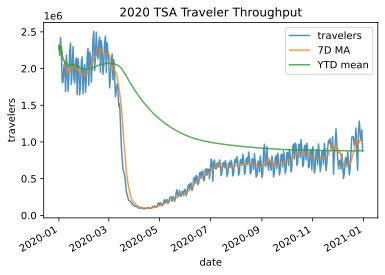

In [54]:
_ = tsa_melted_holiday_travel.loc['2020'].assign(
    **{
        '7D MA': lambda x: x.rolling('7D').travelers.mean(),
        'YTD mean': lambda x: x.expanding().travelers.mean()
      }
).plot(title='2020 TSA Traveler Throughput', ylabel='travelers', alpha=0.8)

Other types of windows:
- [exponentially weighted moving](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html): use the `ewm()` method
- [custom](https://pandas.pydata.org/docs/user_guide/window.html#window-custom-rolling-window): create a subclass of `pandas.api.indexers.BaseIndexer` or use a pre-built one in `pandas.api.indexers`

### [Exercise 2.5](./workbook.ipynb#Exercise-2.5)

##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [55]:
# Complete exercise 2.5 in the workbook.ipynb file
# Click on `Exercise 2.5` above to open the workbook.ipynb file

## Up Next: [Data Visualization](./3-data_visualization.ipynb)